# Customer Behavior Descriptive Analysis

**Course**: IIMK's Professional Certificate in Data Science and Artificial Intelligence for Managers  
**Student Name**: Lalit Nayyar  
**Email ID**: lalitnayyar@gmail.com  
**Assignment Name**: Week 4: Required Assignment 4.1

## Descriptive Analytics Section
In this section, we'll perform detailed descriptive analytics to understand customer behavior patterns and trends.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set visualization style
plt.style.use('default')  # Use default matplotlib style
sns.set_theme(style="whitegrid")  # Set seaborn style
sns.set_palette('husl')  # Set color palette

# Increase font size for better readability
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
def clean_data(df):
    """
    Clean the retail dataset by:
    1. Removing missing values
    2. Removing cancelled orders (those with 'C' in InvoiceNo)
    3. Ensuring positive quantities and prices
    4. Converting InvoiceDate to datetime
    """
    if df is None:
        return None
    
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    # Remove rows with missing values
    df_clean = df_clean.dropna()
    
    # Remove cancelled orders (those with 'C' in InvoiceNo)
    df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.contains('C')]
    
    # Ensure positive quantities and prices
    df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]
    
    # Convert InvoiceDate to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df_clean['InvoiceDate']):
        df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
    
    # Reset index
    df_clean = df_clean.reset_index(drop=True)
    
    print("Data cleaning summary:")
    print(f"Original records: {len(df)}")
    print(f"Clean records: {len(df_clean)}")
    print(f"Removed records: {len(df) - len(df_clean)}")
    
    return df_clean

### 1. Purchase Frequency Analysis

In [6]:
# Load and prepare the data
df = pd.read_excel('Online Retail.xlsx')
print("Original data shape:", df.shape)

# Clean the data
df_clean = clean_data(df)
print("Cleaned data shape:", df_clean.shape)

# Calculate total amount for each transaction
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']
print("Sample of cleaned data with total amount:")
display(df_clean.head())

# Basic statistics of the cleaned dataset
print("Basic statistics of numerical columns:")
display(df_clean.describe())

Original data shape: (541909, 8)
Data cleaning summary:
Original records: 541909
Clean records: 397884
Removed records: 144025
Cleaned data shape: (397884, 8)
Sample of cleaned data with total amount:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340


Basic statistics of numerical columns:


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
count,397884.000,397884,397884.000,397884.000,397884.000
mean,12.988,2011-07-10 23:41:23.511023360,3.116,15294.423,22.397
min,1.000,2010-12-01 08:26:00,0.001,12346.000,0.001
25%,2.000,2011-04-07 11:12:00,1.250,13969.000,4.680
50%,6.000,2011-07-31 14:39:00,1.950,15159.000,11.800
75%,12.000,2011-10-20 14:33:00,3.750,16795.000,19.800
max,80995.000,2011-12-09 12:50:00,8142.750,18287.000,168469.600
std,179.332,NaN,22.098,1713.142,309.071


### 2. Popular Products Analysis

Top 10 Products by Quantity Sold:


,Quantity,TotalAmount,TransactionCount
Description,,,
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.600,1
MEDIUM CERAMIC TOP STORAGE JAR,77916,81416.730,198
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415,13586.250,473
JUMBO BAG RED RETROSPOT,46181,85220.780,1618
WHITE HANGING HEART T-LIGHT HOLDER,36725,100448.150,2028
ASSORTED COLOUR BIRD ORNAMENT,35362,56580.340,1408
PACK OF 72 RETROSPOT CAKE CASES,33693,16394.530,1068
POPCORN HOLDER,30931,23427.710,657
RABBIT NIGHT LIGHT,27202,51346.200,842


Top 10 Products by Revenue:


,Quantity,TotalAmount,TransactionCount
Description,,,
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.600,1
REGENCY CAKESTAND 3 TIER,12402,142592.950,1723
WHITE HANGING HEART T-LIGHT HOLDER,36725,100448.150,2028
JUMBO BAG RED RETROSPOT,46181,85220.780,1618
MEDIUM CERAMIC TOP STORAGE JAR,77916,81416.730,198
POSTAGE,3120,77803.960,1099
PARTY BUNTING,15291,68844.330,1396
ASSORTED COLOUR BIRD ORNAMENT,35362,56580.340,1408
Manual,7173,53779.930,284


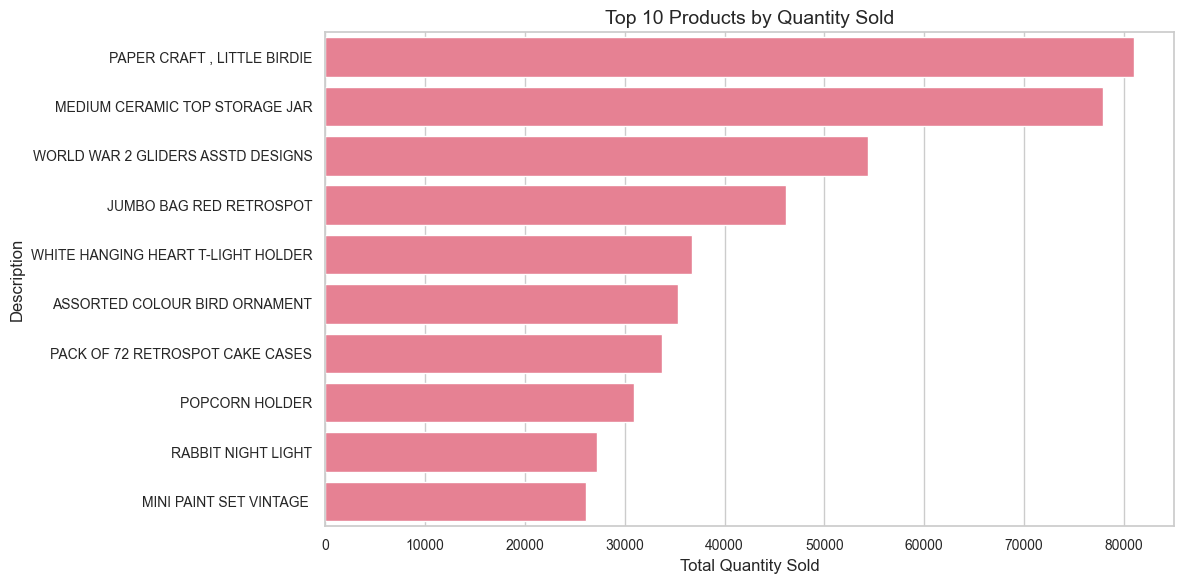

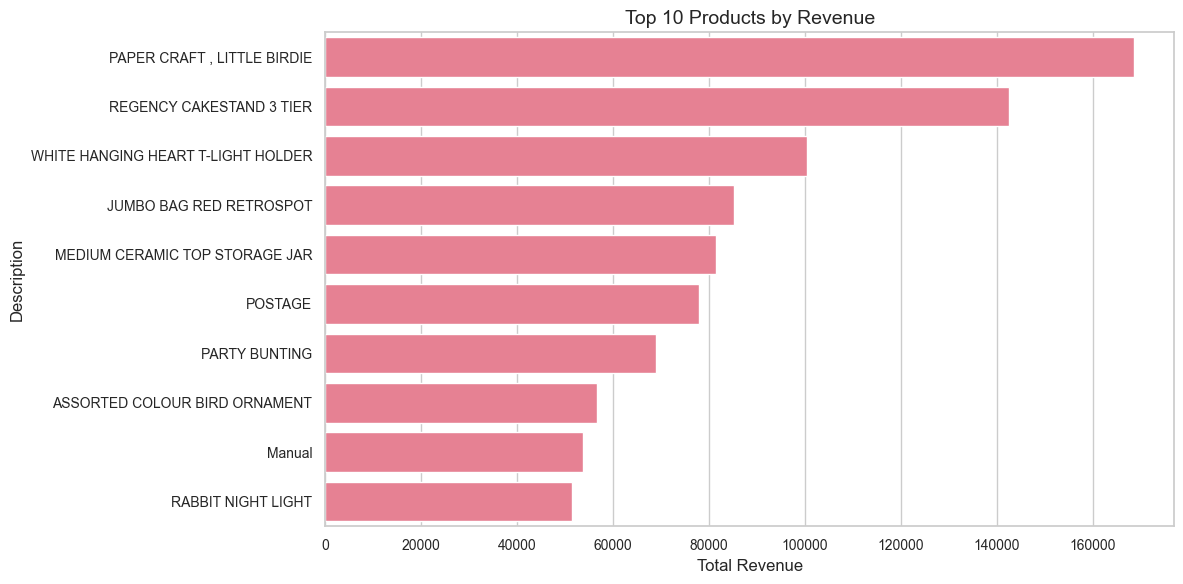

In [7]:
# Analyze top selling products
product_sales = df_clean.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum',
    'InvoiceNo': 'count'
}).rename(columns={'InvoiceNo': 'TransactionCount'})

# Sort by quantity sold
top_products_by_quantity = product_sales.sort_values('Quantity', ascending=False).head(10)

# Display top products by quantity
print("Top 10 Products by Quantity Sold:")
display(top_products_by_quantity)

# Sort by total amount
top_products_by_amount = product_sales.sort_values('TotalAmount', ascending=False).head(10)

# Display top products by revenue
print("Top 10 Products by Revenue:")
display(top_products_by_amount)

# Visualize top products by quantity
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y=top_products_by_quantity.index, data=top_products_by_quantity)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

# Visualize top products by revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalAmount', y=top_products_by_amount.index, data=top_products_by_amount)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.tight_layout()
plt.show()

### 3. Temporal Purchase Patterns

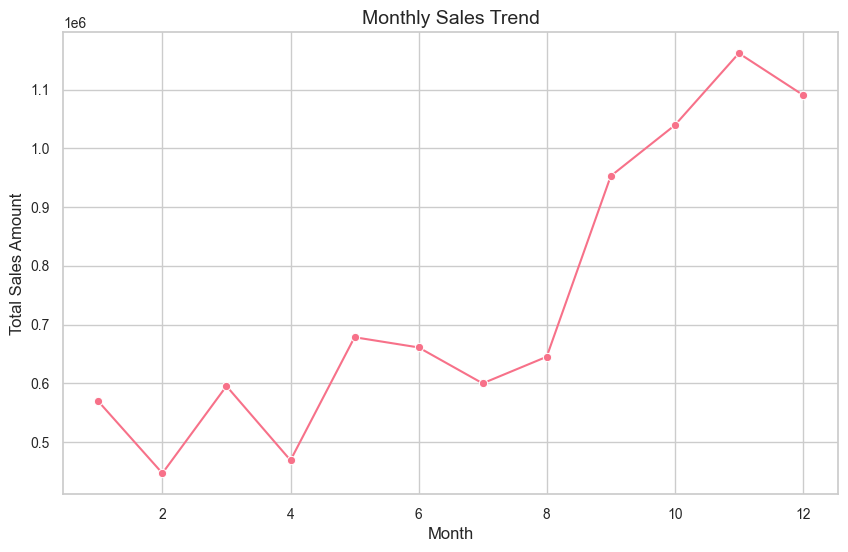

In [8]:
# Add datetime components
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

# Monthly sales trend
monthly_sales = df_clean.groupby('Month')['TotalAmount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalAmount', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()

### 4. Customer Spending Analysis

Customer Spending Statistics:
--------------------------------------------------
       TotalSpent  AverageTransactionValue  TransactionCount  TotalItems
count    4338.000                 4338.000          4338.000    4338.000
mean     2054.266                   68.350            91.721    1191.289
std      8989.230                 1467.919           228.785    5046.082
min         3.750                    2.100             1.000       1.000
25%       307.415                   12.370            17.000     160.000
50%       674.485                   17.725            41.000     379.000
75%      1661.740                   24.858           100.000     992.750
max    280206.020                77183.600          7847.000  196915.000


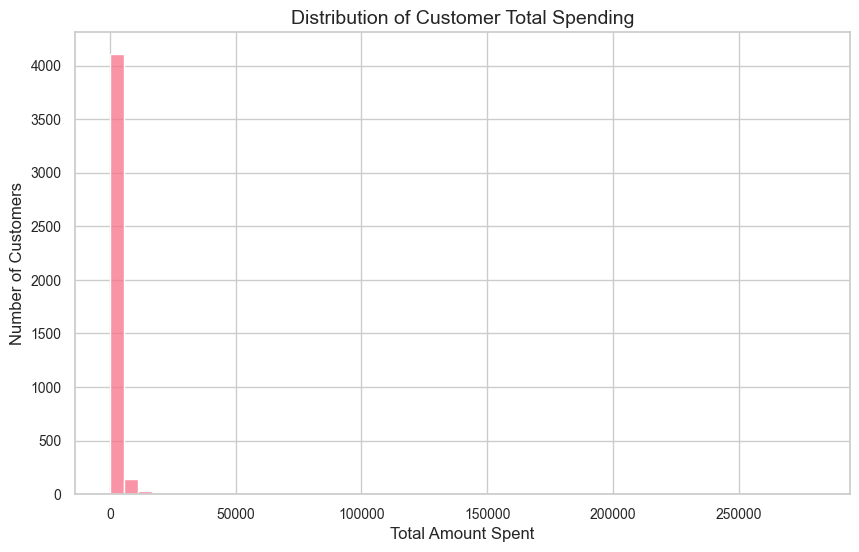

In [9]:
# Calculate customer spending metrics
customer_spending = df_clean.groupby('CustomerID').agg({
    'TotalAmount': ['sum', 'mean', 'count'],
    'Quantity': 'sum'
}).round(2)

customer_spending.columns = ['TotalSpent', 'AverageTransactionValue', 'TransactionCount', 'TotalItems']

print("Customer Spending Statistics:")
print("-" * 50)
print(customer_spending.describe())

# Visualize distribution of customer spending
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_spending, x='TotalSpent', bins=50)
plt.title('Distribution of Customer Total Spending')
plt.xlabel('Total Amount Spent')
plt.ylabel('Number of Customers')
plt.show()

### 5. Key Insights Summary

Based on the descriptive analytics performed above, we can identify the following key patterns and trends:

**What:**
- Most popular products and their sales volumes
- Distribution of transaction values
- Customer spending patterns

**Which:**
- Which products are bestsellers
- Which months show highest sales
- Which customers are most valuable (by spending)

**How Many:**
- Average purchases per customer
- Total transactions per product
- Distribution of order quantities